In [50]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [11]:
random_state = 420

### Load Breast Cancer Dataset

In [2]:
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
breast_cancer = pd.DataFrame(data=load_breast_cancer().data, 
                             columns=load_breast_cancer().feature_names)
breast_cancer['target'] = load_breast_cancer().target
breast_cancer['target_names'] = [load_breast_cancer().target_names[x] for x in load_breast_cancer().target]

In [4]:
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


### Preprocess Data

#### Set the values of the X and Y variables

In [15]:
X = breast_cancer.iloc[:,:30]
y = breast_cancer['target']

#### Split the data into a traning and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

In [18]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

#### Scale the data (use MinMaxScaler)

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train the Data on a Logistic Regression Model

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

In [25]:
print(f'training accuracy: {train_score}')
print(f'test accuracy: {test_score}')

training accuracy: 0.971830985915493
test accuracy: 0.965034965034965


436       benign
264    malignant
121    malignant
96        benign
250    malignant
         ...    
410       benign
533    malignant
25     malignant
337    malignant
95     malignant
Name: target_names, Length: 143, dtype: object

In [48]:
test_df = pd.DataFrame({'actual': y_test,
                        'actual_values': breast_cancer.iloc[y_test.index]['target_names'],
                        'predicted_probability': [x[1] for x in lr.predict_proba(X_test)],
                        'predicted': lr.predict(X_test)})
test_df['predicted_values'] = ['benign' if x else 'malignant' for x in test_df['predicted']]

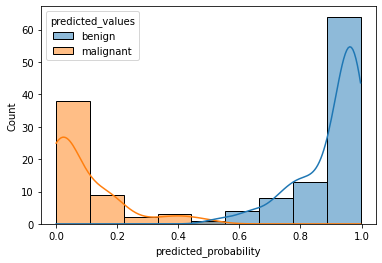

In [51]:
ax = sns.histplot(data=test_df, x="predicted_probability", hue='predicted_values', kde=True)